# **LINEAR REGRESSION ALGORITHM IMPLEMENTATION FROM SCRATCH!**

In this notebook we will be implementing the Linear Regression Algorithm of Machine Learning from scratch to predict the Life Expectancy with the help of data provided by Kaggle website.

In this example, we are particularly looking at **Multiple Linear Regression** as there are more than **one independent variable** and only **one dependent variable**.

Linear Regression is one of the most efficient and easy ways to make predictions when the dependent variables and independent variables share linear relationship. We use this for prediction of continuous values.

Equation for line of linear regression is as follows:

**Y = (W0 * X0) + (W1 * X1) + (W2 * X2) + ...... + B**

To start with developing the model, we will first import all the dependencies!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split
from google.colab import files
import io

Now, we will import the dataset that we will be using in this notebook and print the head.

In [2]:
up = files.upload()
df = pd.read_csv(io.BytesIO(up['Life Expectancy Data.csv']))
df.head()

Saving Life Expectancy Data.csv to Life Expectancy Data (2).csv


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Next, we drop all the null values and columns of least significance from the main data. Also, we check if need to create dummy variables for any categorical values. In this case, we do not need to. So we move forward.

In [3]:
df.dropna(inplace = True)

df.drop(['Country', 'Year', 'Status'], axis = 1, inplace = True)

df.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


Moving on, we seperate the datasets into the independent variables and target(or dependent) variables. Also, we convert the values into the scale of -1 to 1 for the **gradient_descent()** function(which we will encouter later into the program) to work properly.

To convert the values we use the following function:

**X(i) = (X(i) - mean)/(max - min)**

In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

X = (X - X.mean())/(X.max() - X.min())
y = (y - y.mean())/(y.max() - y.min())

Next, we use the **train_test_split()** provided by **sklearn.model_selection** module to split our dataset into two parts - Train and Test. 

We set the test size to 0.33 to split the data in to train and test in ratio 2:1.

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

Next, we will convert the target variable to a numpy narray and take the transpose of our data since that is how our model demands it to be.

In [6]:
y_train = np.array([y_train])
y_test = np.array([y_test])

In [7]:
X_train = X_train.T
X_test = X_test.T

Next, we define a function **initialize_parameters()** to initialize our parameter w and b.

The variable description is as follows:

**w**: is an array of values to the co-efficients of each independent variables as mentioned in the equation above.

**b**: is the y intercept constant as in the equation of a line.

**lenw**: is the number of independent variables in our dataset which is also the number of co-efficients

In [8]:
def initialize_parameters(lenw):
  w = np.random.randn(1, lenw)
  b = 0
  return w,b

Now, we define the function **forward_prop()** function to predict the values for the corresponding values nof w and b. We use the function **dot()** provided by **numpy** library for the matrix type multiplication. And since the b is a scalar value it is broadcasted to the numpy array.

Variable Description:

**X** : The test dataset of independent variables

**z** : is the array of predicted values

In [9]:
def forward_prop(X, w, b):
  z = np.dot(w,X) + b
  return z

Now, we define the **cost_function()** which helps in minimizing the cost or the error of our model. The cost function for the linear regression model is:

**J = (1/2m)*(Σ(z(i)-y(i)))**

Variable Desciption:

**m**: Number of datas in the dataset

**J**: stores the cost value

In [10]:
def cost_function(z,y):
  m = y.shape[1]
  J = (1/(2*m))*np.sum(np.square(z-y))
  return J

Next, we create the function for back propogation as **back_prop()**.

Essentially, backpropagation evaluates the expression for the derivative of the cost function as a product of derivatives between each layer from left to right – "backwards" – with the gradient of the weights between each layer being a simple modification of the partial products (the "backwards propagated error").

Variable Description:

**dz**: derivative of z

**dw**: product of dz and transpose of X

**db**: total sum of the dz array

In [11]:
def back_prop(X, y, z):
  m = y.shape[1]
  dz = (1/m)*(z-y)
  dw = np.dot(dz, X.T)
  db = np.sum(dz)
  return dw, db

Now, we define the **gradient_descent_update()** function which helps us to update the values of w and b respectively as we move from one iteration to another.

Variable Description:

**learning_rate**: is a custom initialized variable which defines the rate by which the values of w and b changes after each iteration

In [12]:
def gradient_descent_update(w,b,dw,db,learning_rate):
  w = w - learning_rate*dw
  b = b - learning_rate*db
  return w,b

Finally, to fit create the model, we create the function as **linear_regression_model()**. It helps us fit the train data and make predictions for the test data simultaneously. It also calculate and prints the root means squared value of our model. Alongside, it visualizes our data using scatter plot.

Variable Description:

**X_train**: the training dataset of the independent variables

**y_train**: the training dataset of the dependent variables

**x_val**: the testing dataset of the independent variables

**y_val**: the testing dataset of the dependent variables

**m_train**: number of data in the training dataset

**m_val**: number of data in the testing data

**cost_train**: cost value of the training dataset

**cost_val**: cost value of the testing dataset

**RMSE_train**: RMSE value for the training dataset

**RMSE_val**: RMSE value for the testing dataset

**epochs**: number of iterations

In [13]:
def linear_regression_model(X_train, y_train, X_val, y_val, learning_rate, epochs):
  lenw = X_train.shape[0]
  w,b = initialize_parameters(lenw)

  costs_train = []
  m_train = y_train.shape[1]
  m_val = y_val.shape[1]

  for i in range(1, epochs+1):
    z_train = forward_prop(X_train,w,b)
    cost_train = cost_function(z_train, y_train)
    dw,db = back_prop(X_train, y_train, z_train)
    w,b = gradient_descent_update(w,b,dw,db,learning_rate)

    if(i%10 == 0):
      costs_train.append(cost_train)
    RMSE_train = np.sqrt((1/m_train)*np.sum(np.square(z_train - y_train)))

    z_val = forward_prop(X_val,w,b)
    cost_val = cost_function(z_val, y_val)
    RMSE_val = np.sqrt((1/m_val)*np.sum(np.square(z_val - y_val)))

    if(i == epochs):
      print("The Root Mean Squared Error of the model is ", RMSE_val)
  plt.scatter(y_val, z_val)
  plt.title("Final Predictions vs The Test Values: ")
  plt.show()

Ultimately we fit the data to our model. We fix the values of learning rate and epochs at 0.4 and 500 respectively.

The Root Mean Squared Error of the model is  0.11925453480491235


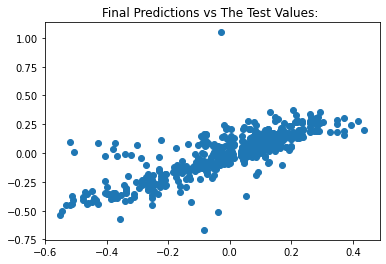

In [14]:
linear_regression_model(X_train, y_train, X_test, y_test, 0.4, 500)

We, find that our models runs at a very good rate of efficiency as the **RMS error value** of our model is only **0.11925** which is very good. Also, from the scatter plot we can observe that a straight line can definitely be drawn through the cluster of points in a way that the errors can pe minimised and almost accurate predictions can be made for any new data.

### Thank You!!!